Info about the sample listers:
Jino & Scott - top lister - Private Rooms only - ~1666
Magical Holiday Mansion - 3rd top lister 10x < J&S  - private rooms only ~109
Fen - Med Lister - Private Rooms only ~66

Blueground - 2nd top lister - entire home/apts only ~616
The Line Collection - 4th top lister - entire home/apts only ~106
Julia & Joe - Med Lister - Entire Home/Apts only ~62

In [21]:
#import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [22]:
#import data files
reviews_path = "Resources/reviews_LA.csv"
listings_path = "Resources/listings_LA.csv"
neighborhoods_path = "Resources/neighbourhoods_LA.csv"

In [23]:
# Create the listing dataframe
listing_df = pd.read_csv(listings_path)
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,770565020594037590,Phillips Ranch room with a view,30603612,Yamileth,Other Cities,Pomona,34.031856,-117.777994,Private room,61,5,1,2022-12-26,0.42,5,27,1,NaN
1,777451666060243581,Family oriented home,490709958,Dana,Unincorporated Areas,Castaic Canyons,34.439250,-118.444090,Private room,399,3,0,NaN,NaN,1,87,0,NaN
2,698097753730921190,方便易居驿站,444692513,Hanna,Other Cities,Pomona,34.048480,-117.768870,Private room,46,3,5,2023-01-16,0.86,4,87,5,NaN
3,13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,Other Cities,Rancho Palos Verdes,33.738420,-118.395800,Private room,408,3,53,2022-11-26,0.64,10,270,13,NaN
4,39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,Other Cities,Rancho Palos Verdes,33.748420,-118.311000,Private room,80,2,44,2023-02-24,1.09,4,357,26,NaN


In [24]:
# remove unecessary columns from datframe
listing_clean_df = listing_df.drop(listing_df.columns[[0, 2, 6, 7, 17]], axis=1)
# combine name iterations of the top lister
listing_clean_df['host_name'] = listing_clean_df['host_name'].replace('Scott And Jino', 'Jino & Scott')

listing_clean_df.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Phillips Ranch room with a view,Yamileth,Other Cities,Pomona,Private room,61,5,1,2022-12-26,0.42,5,27,1
1,Family oriented home,Dana,Unincorporated Areas,Castaic Canyons,Private room,399,3,0,NaN,NaN,1,87,0
2,方便易居驿站,Hanna,Other Cities,Pomona,Private room,46,3,5,2023-01-16,0.86,4,87,5
3,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,Beth,Other Cities,Rancho Palos Verdes,Private room,408,3,53,2022-11-26,0.64,10,270,13
4,Brand New Duplex Near World Cruise Center,Jae,Other Cities,Rancho Palos Verdes,Private room,80,2,44,2023-02-24,1.09,4,357,26


In [25]:
# get list of neighborhood groups
neighborhood_groups = listing_clean_df['neighbourhood_group'].unique()
print(neighborhood_groups)

['Other Cities' 'Unincorporated Areas' 'City of Los Angeles']


In [26]:
# Narrow neighborhoods down to city of LA
la_neighborhoods_df = listing_clean_df.loc[listing_clean_df['neighbourhood_group'] == 'City of Los Angeles']

# eliminate potential outliers for price over $400
la_neighborhoods_df = la_neighborhoods_df.loc[la_neighborhoods_df['price'] < 400]

la_neighborhoods_df.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6,"Single BR with King size bed, and shared bathroom",Arthur,City of Los Angeles,San Pedro,Private room,55,2,3,2023-02-24,3.00,1,1,3
50,Corner unit 4 bedroom townhome with pool! Must...,Javier,City of Los Angeles,Porter Ranch,Entire home/apt,195,365,0,NaN,NaN,1,365,0
59,Sheared Space BunkBed #3,Ashman,City of Los Angeles,Vermont Knolls,Shared room,17,30,0,NaN,NaN,5,261,0
62,Guesthouse in Los Ángeles,Mario,City of Los Angeles,Northridge,Entire home/apt,175,2,13,2023-03-05,2.12,1,347,13
64,"Private guesthouse CSUN, Studio City, Hollywood",Cynthia,City of Los Angeles,Granada Hills,Entire home/apt,135,30,57,2020-08-23,1.31,1,365,0


In [27]:
# list the unique neighborhoods in LA
# la_neighborhoods_df["neighbourhood"].value_counts()
room_types = la_neighborhoods_df['room_type'].value_counts()
total_rooms = la_neighborhoods_df['room_type'].count()
print(room_types)
print(total_rooms)

Entire home/apt    12959
Private room        5881
Shared room          451
Hotel room            21
Name: room_type, dtype: int64
19312


In [39]:
vacant_ltm_df = la_neighborhoods_df[la_neighborhoods_df['number_of_reviews_ltm'] == 0]
vacant_rooms_total = vacant_ltm_df['host_name'].count()


In [40]:
vacant_ltm_rooom_types = vacant_ltm_df['room_type'].value_counts()
print(vacant_ltm_rooom_types)
print(vacant_rooms_total)

Entire home/apt    6249
Private room       4328
Shared room         370
Hotel room           14
Name: room_type, dtype: int64
10959


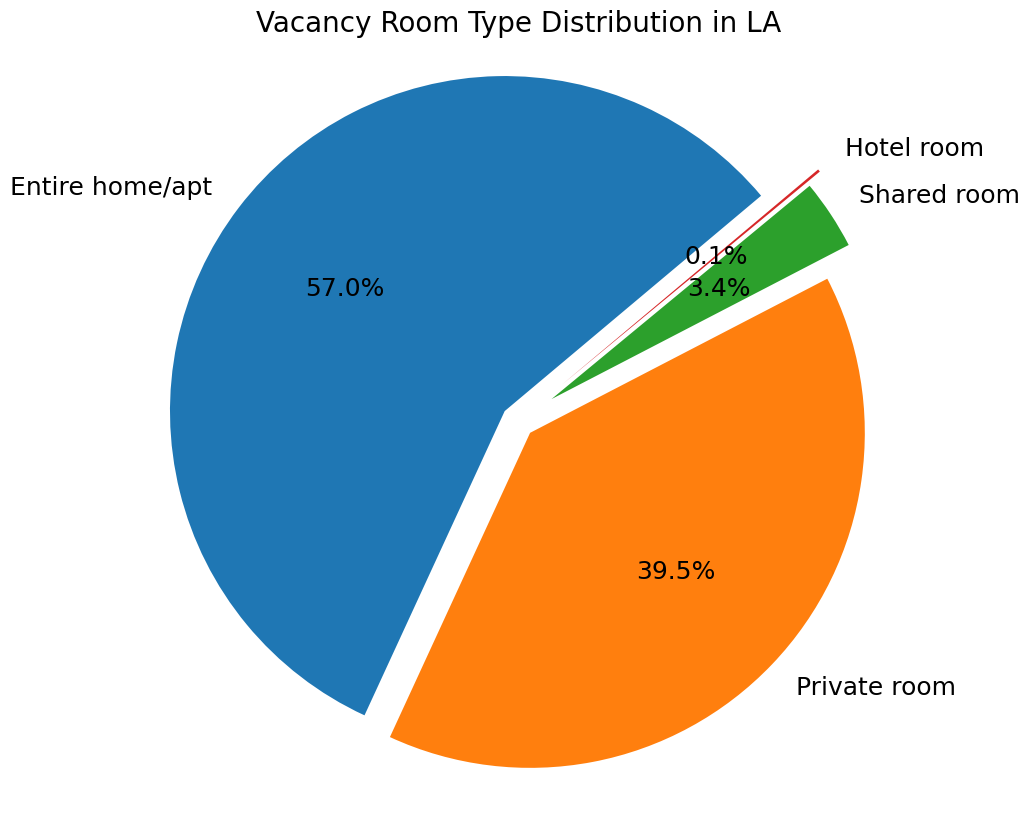

In [30]:
plt.figure(figsize=(10,10))
explode = [0.05, 0.05, 0.12, 0.17]
plt.pie(vacant_ltm_rooom_types, explode=explode, labels=room_types.index, autopct='%1.1f%%', startangle=40, textprops={'fontsize': 18})
plt.axis('equal')
plt.title('Vacancy Room Type Distribution in LA', fontsize=20)
plt.show()

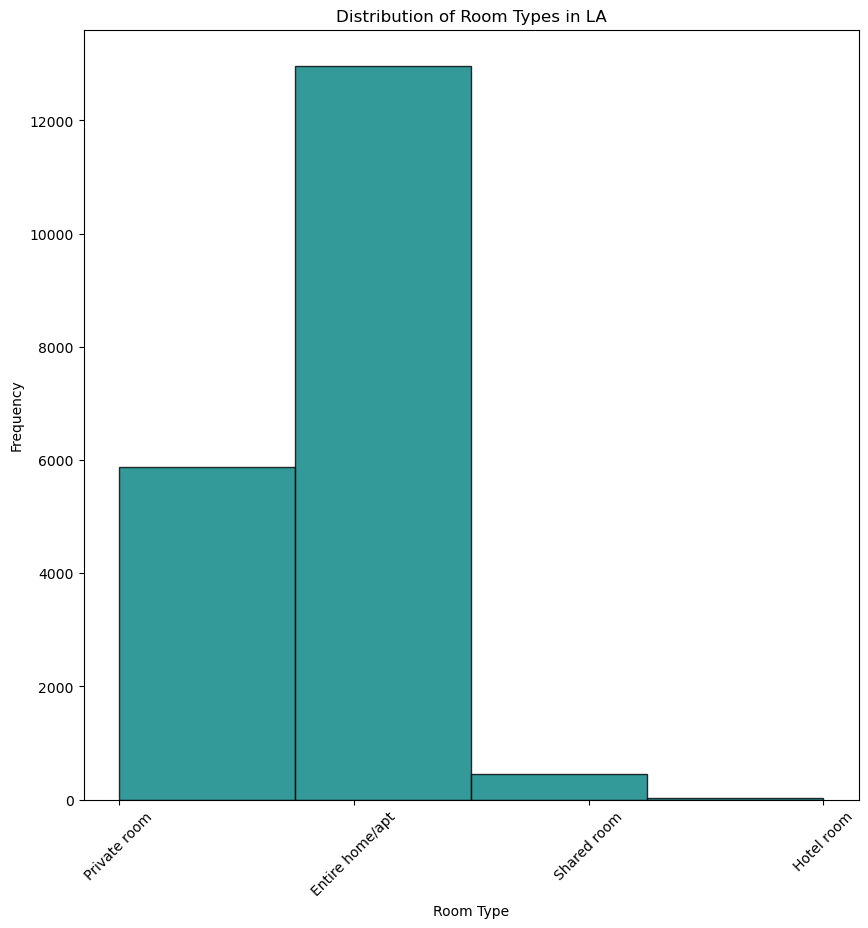

In [31]:
# create a histogram of the room type frequency in LA
plt.figure(figsize=(10, 10))
plt.hist(la_neighborhoods_df['room_type'], bins=4, alpha=0.8, color=['teal'], edgecolor='black')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title("Distribution of Room Types in LA")
plt.xticks(rotation=45)
plt.show()

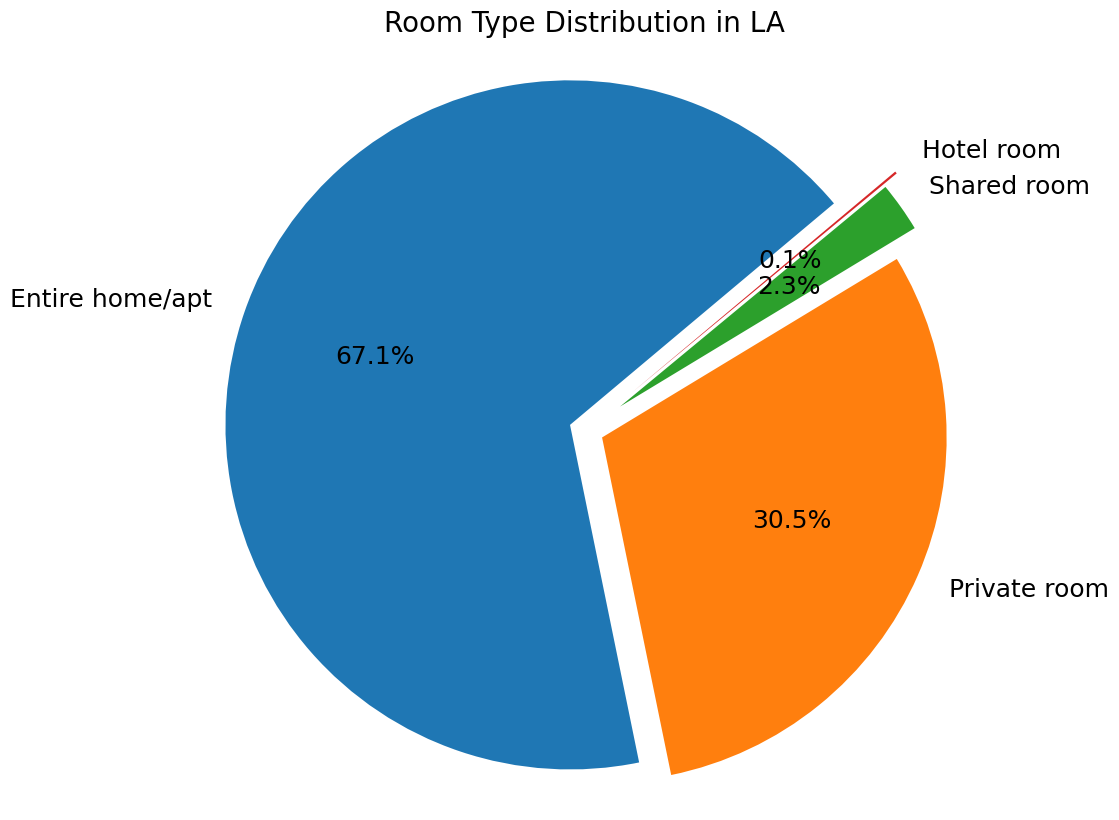

In [32]:
plt.figure(figsize=(10,10))
explode = [0.05, 0.05, 0.12, 0.17]
plt.pie(room_types, explode=explode, labels=room_types.index, autopct='%1.1f%%', startangle=40, textprops={'fontsize': 18})
plt.axis('equal')
plt.title('Room Type Distribution in LA', fontsize=20)
plt.show()

In [33]:
# variables for the top and medium level listers
j_s = la_neighborhoods_df.loc[la_neighborhoods_df['host_name'] == 'Jino & Scott']
blueground = la_neighborhoods_df.loc[la_neighborhoods_df['host_name'] == 'Blueground']
fen = la_neighborhoods_df.loc[la_neighborhoods_df['host_name'] == 'Fen']
j_j = la_neighborhoods_df.loc[la_neighborhoods_df['host_name'] == 'Julia & Joe']
mag = la_neighborhoods_df.loc[la_neighborhoods_df['host_name'] == 'The Magical Holiday Mansion']
theline = la_neighborhoods_df.loc[la_neighborhoods_df['host_name'] == 'The Line Collection']


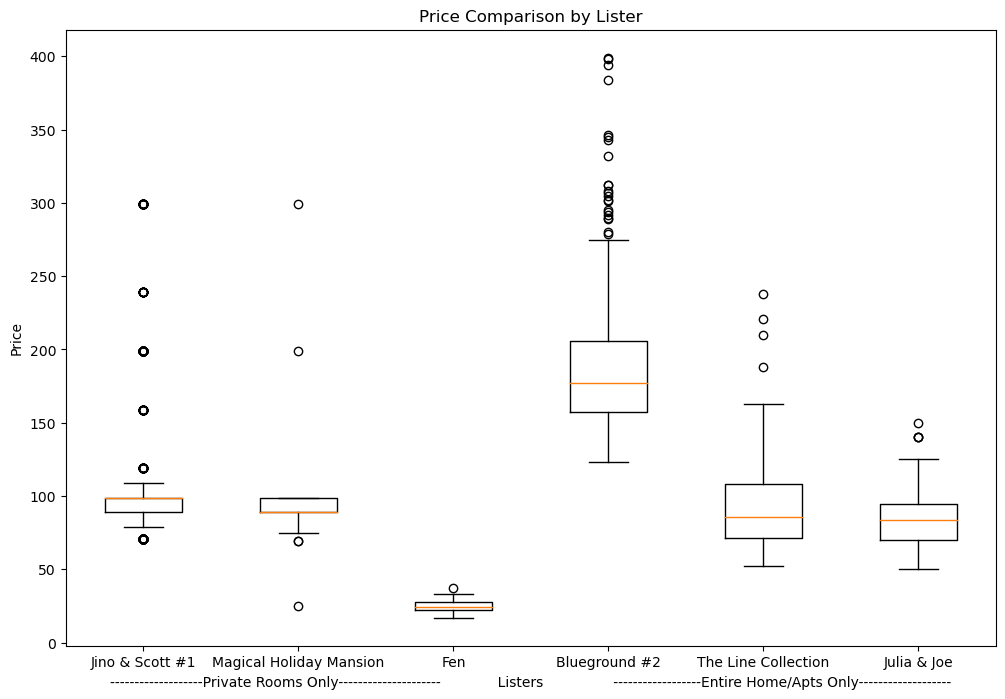

In [34]:
plt.figure(figsize=(12, 8))
plt.boxplot([j_s['price'], mag['price'], fen['price'], blueground['price'], theline['price'], j_j['price']], labels=['Jino & Scott #1', 'Magical Holiday Mansion', 'Fen', 'Blueground #2', 'The Line Collection', 'Julia & Joe'])
plt.xlabel('-------------------Private Rooms Only---------------------             Listers                ------------------Entire Home/Apts Only-------------------')
plt.ylabel('Price')
plt.title('Price Comparison by Lister')
plt.show()

In [35]:
print(j_s['price'].mean())
print(mag['price'].mean())
print(fen['price'].mean())

print(blueground['price'].mean())
print(theline['price'].mean())
print(j_j['price'].mean())


105.375
93.4770642201835
24.71212121212121
186.66938110749186
95.47169811320755
87.59677419354838


In [36]:
print(j_s['price'].median())
print(mag['price'].median())
print(fen['price'].median())

print(blueground['price'].median())
print(theline['price'].median())
print(j_j['price'].median())

99.0
89.0
24.5
177.0
86.0
84.0
